In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Banking.csv')
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [3]:
df.shape

(3000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [5]:
df['Estimated Income'].min()

15919.48

In [6]:
bins=[0,100000,300000,float('inf')]
labels=['low','Med','High']

df['Income Band']=pd.cut(df['Estimated Income'],bins=bins,labels=labels,right=False)


<Axes: xlabel='Income Band'>

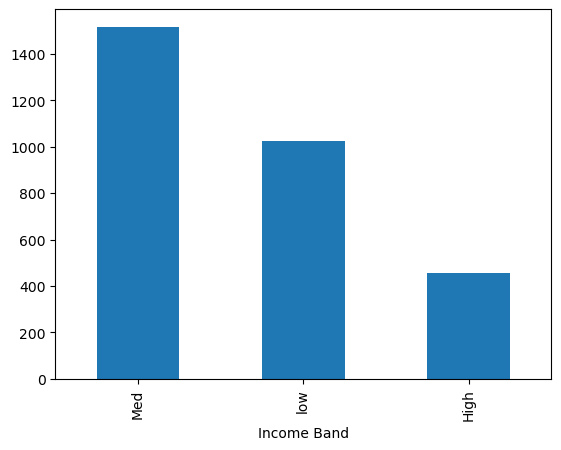

In [7]:
df['Income Band'].value_counts().plot(kind='bar')

In [8]:
categorical_cols=df[["BRId","GenderId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns

for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())

Value counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value counts for 'Income Band':


Income Band
Med     1517
low     1027
High     456
Name: count, dtype: int64

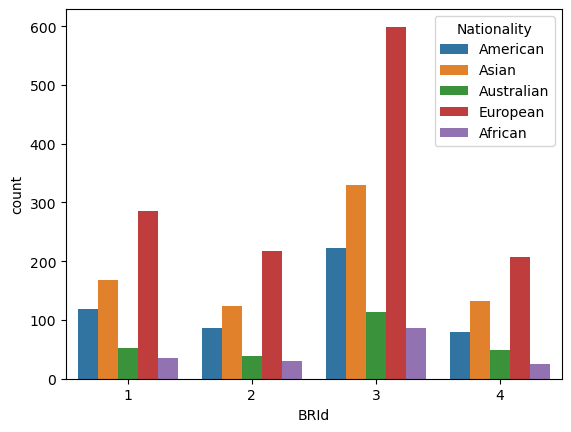

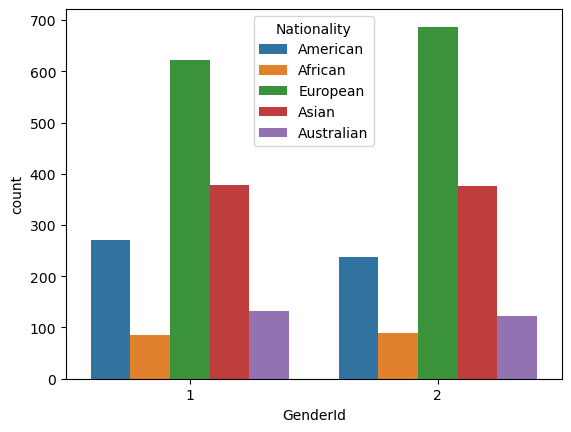

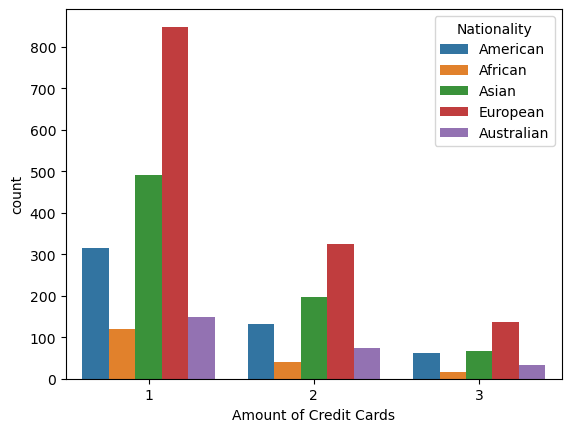

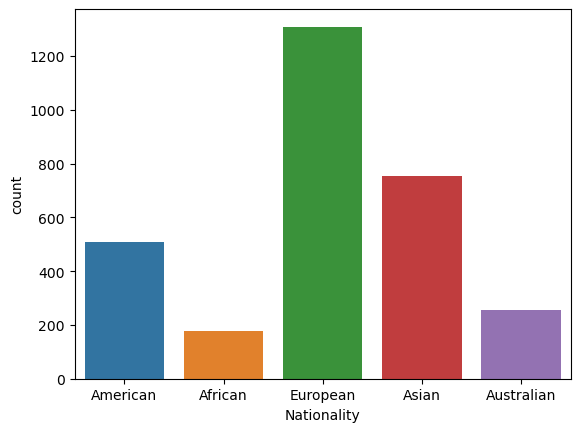

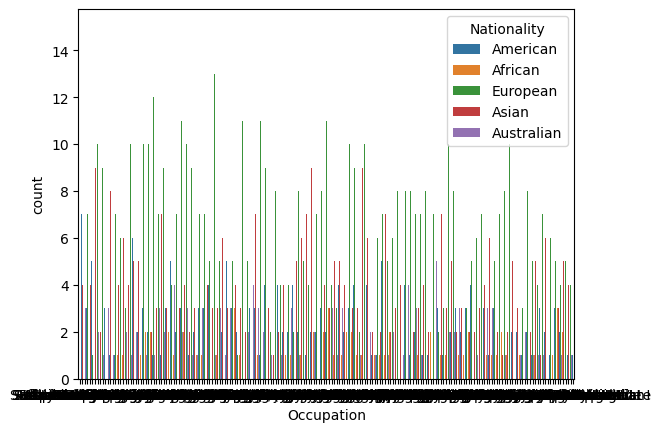

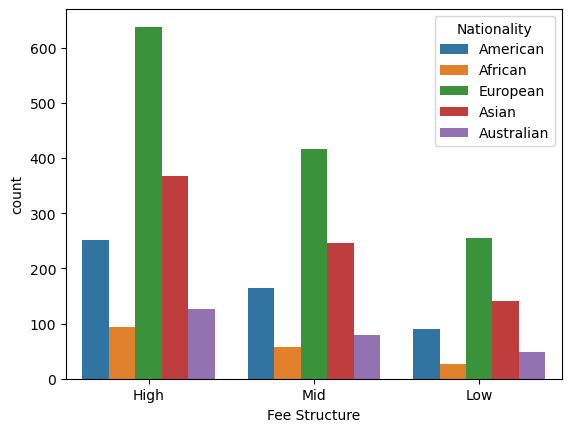

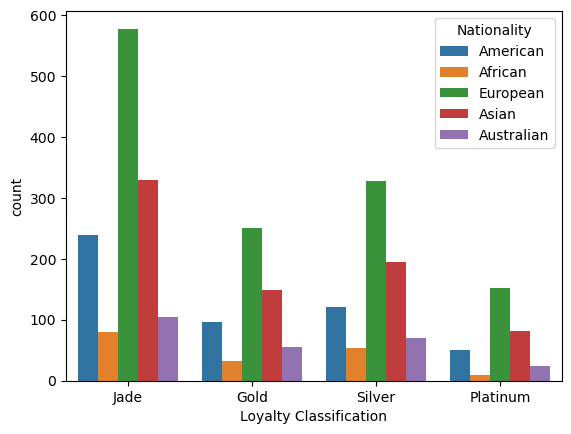

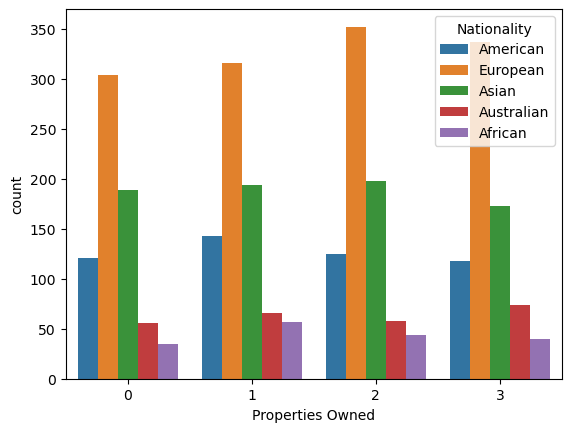

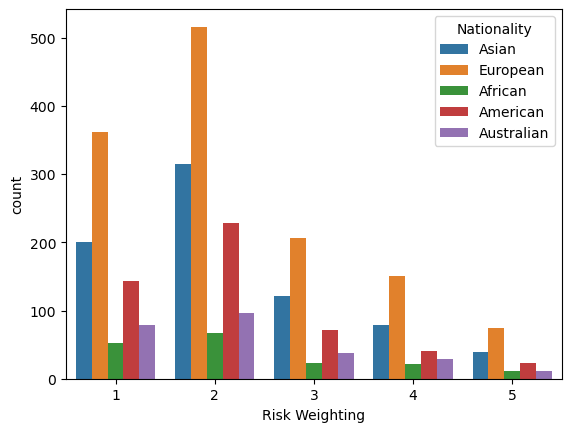

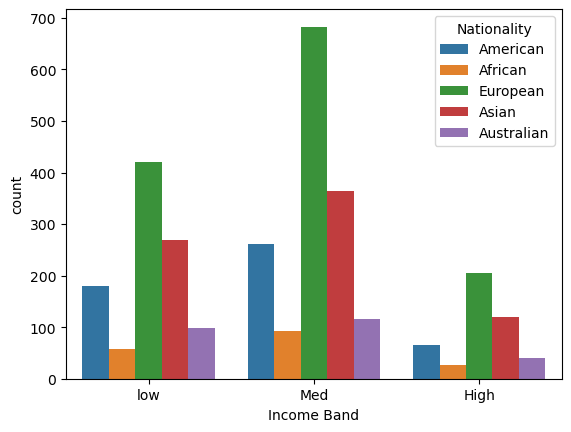

In [9]:
for i,predictor in enumerate (df[["BRId","GenderId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue="Nationality")

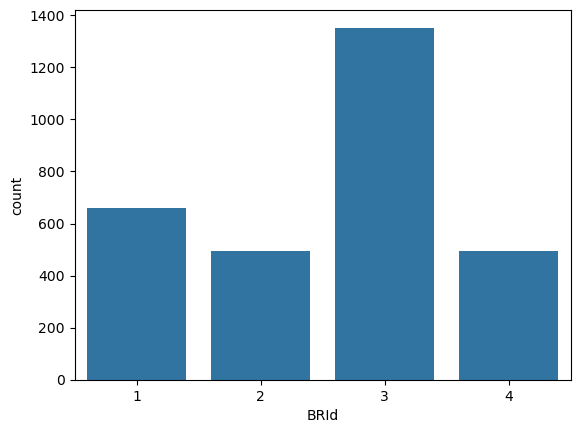

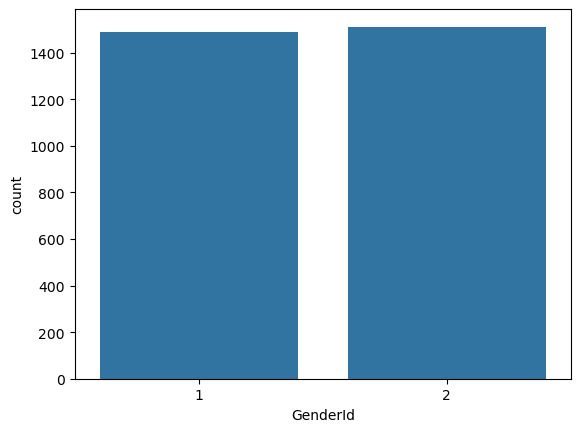

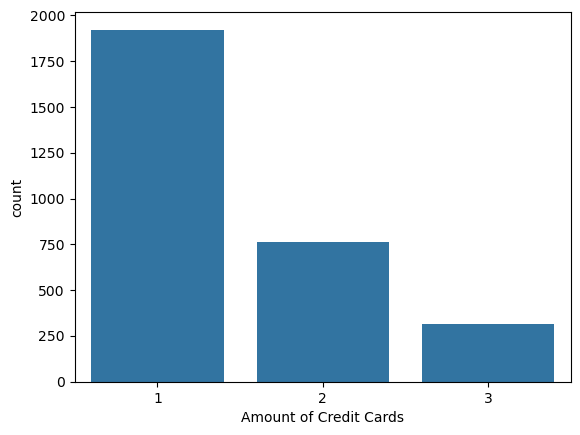

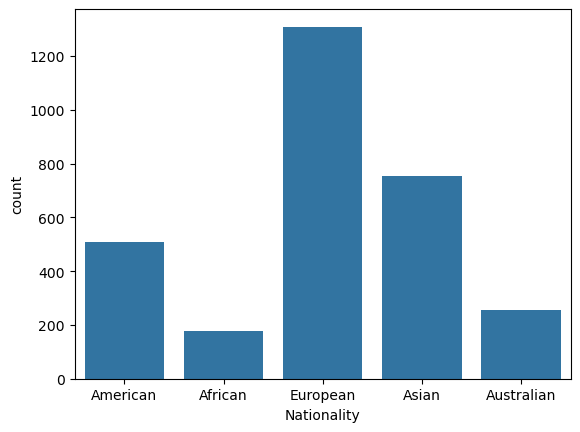

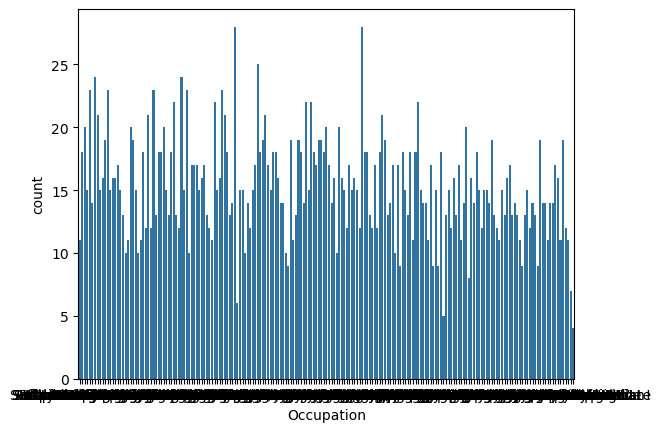

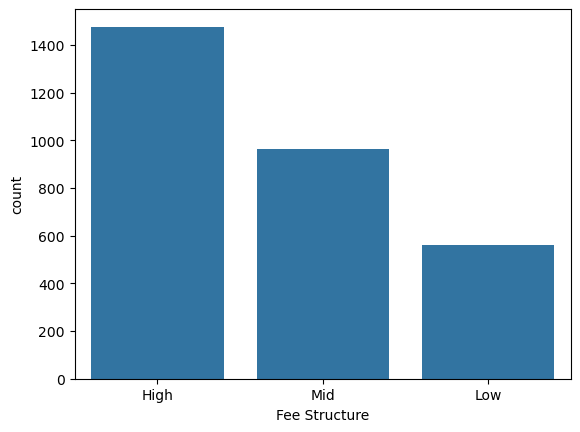

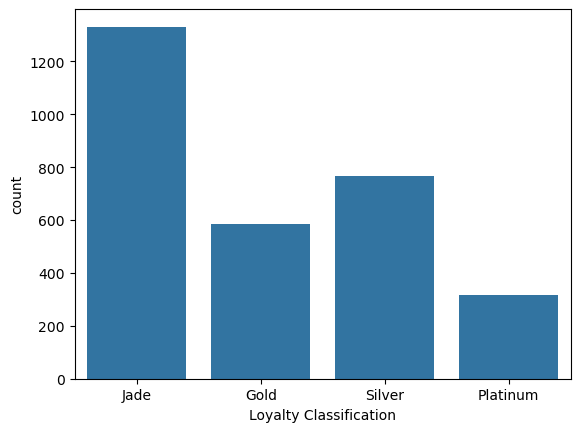

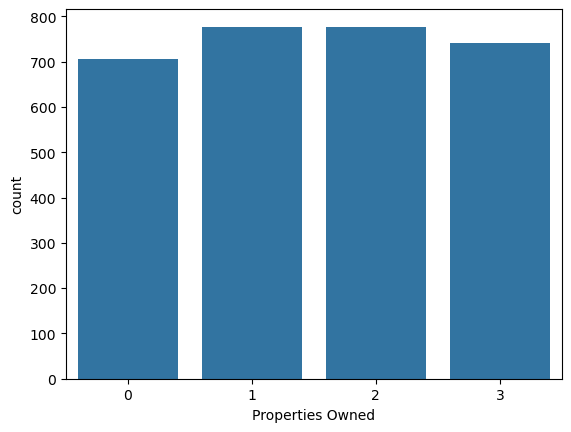

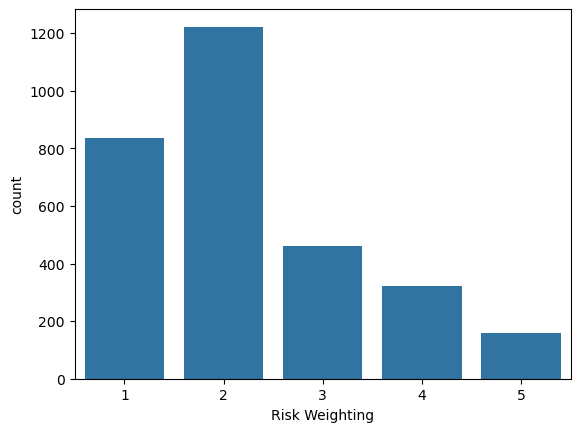

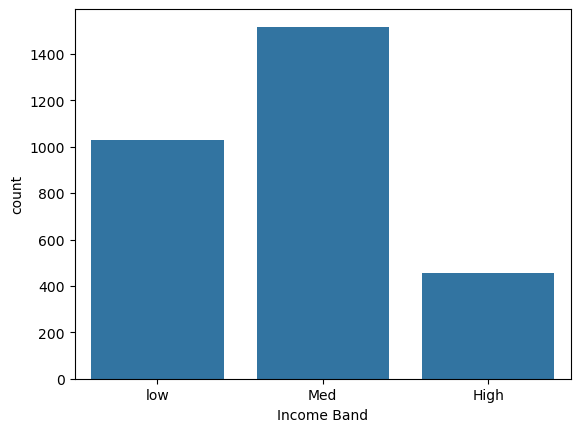

In [10]:
for i,predictor in enumerate (df[["BRId","GenderId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df,x=predictor)

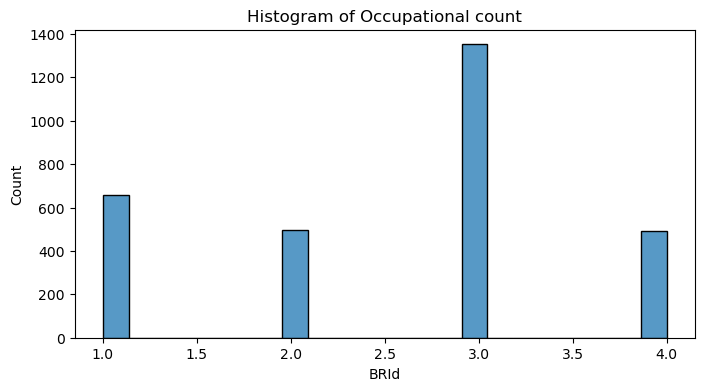

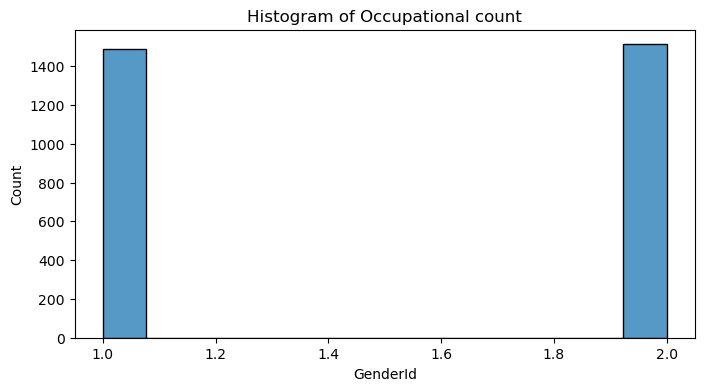

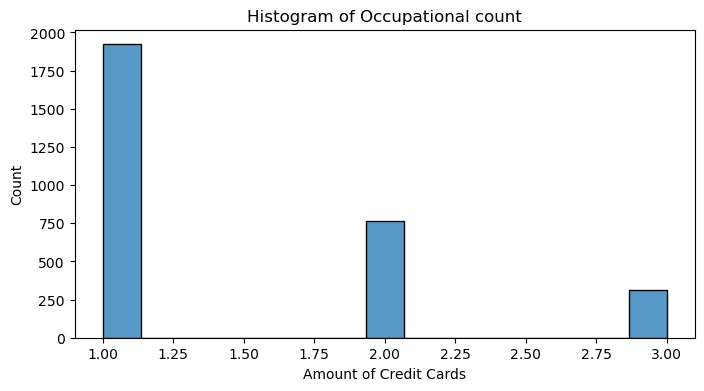

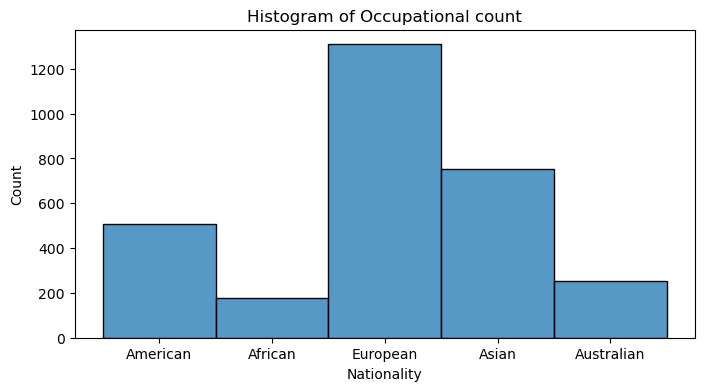

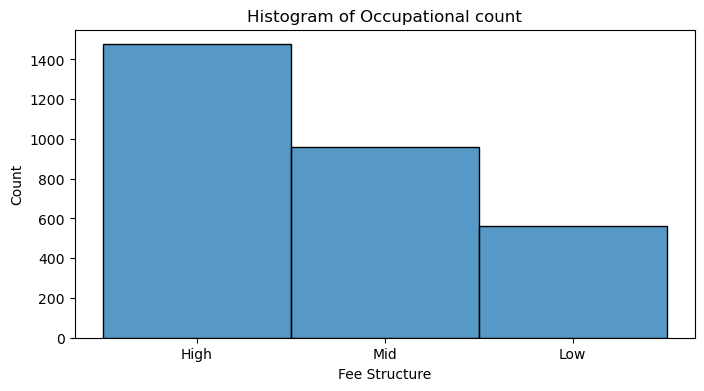

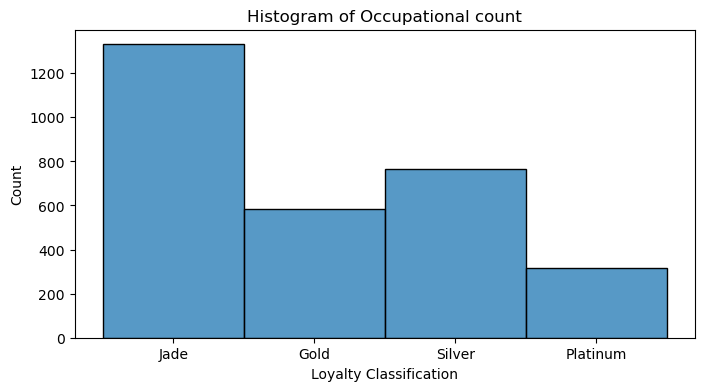

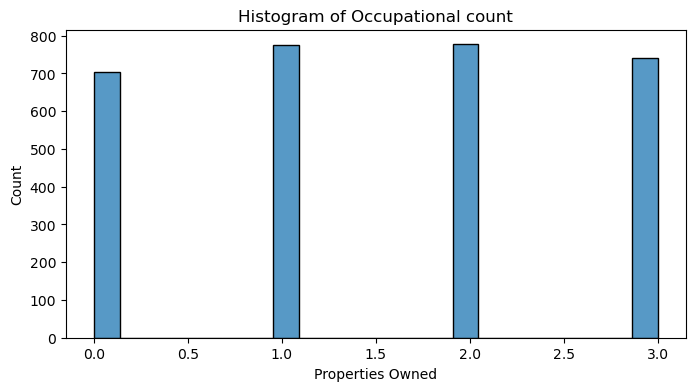

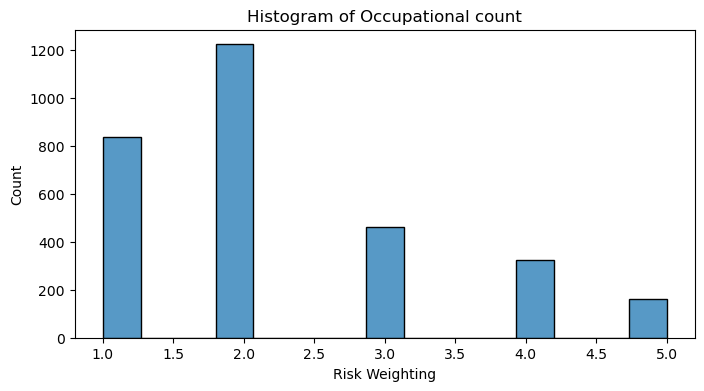

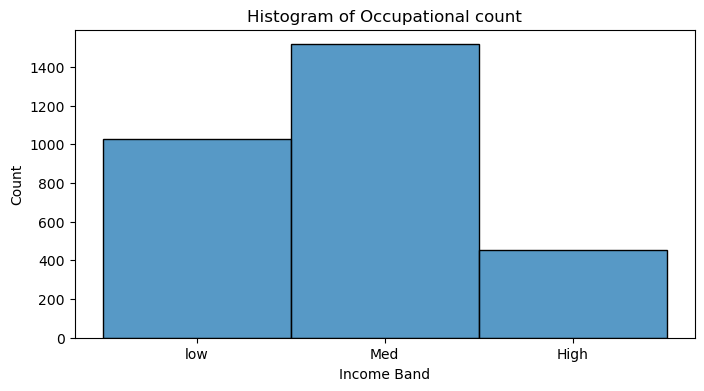

In [11]:
# Histogram plot

for col in categorical_cols:
    if col== "Occupation":
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupational count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



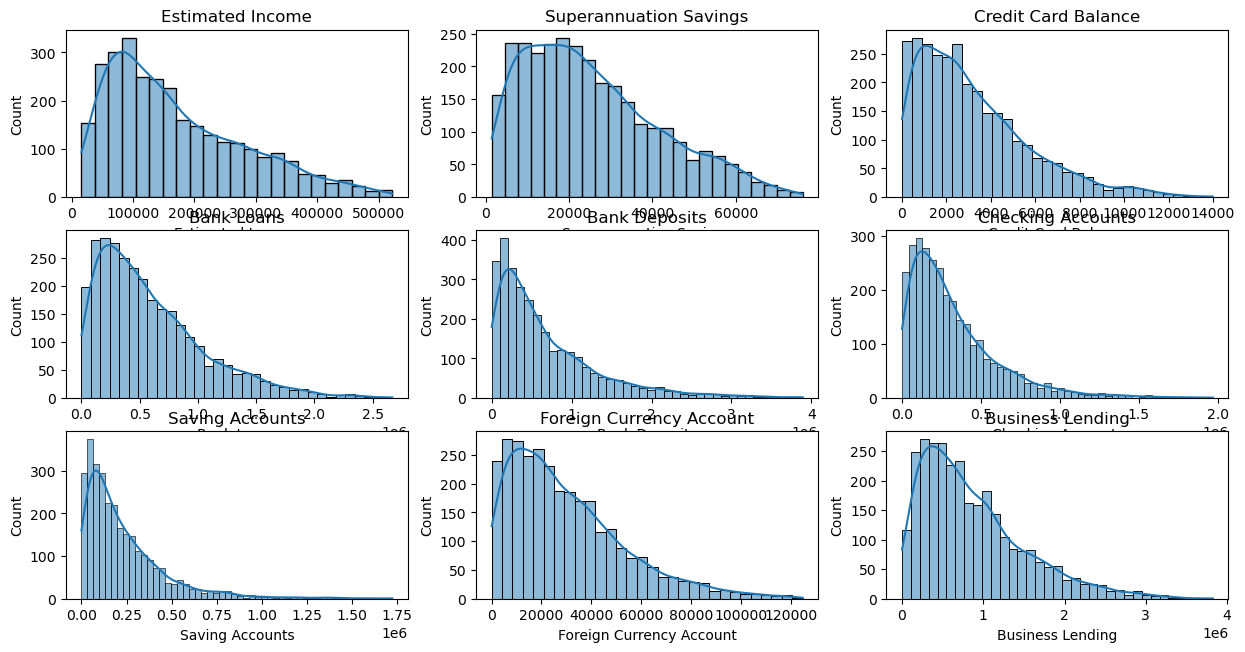

In [12]:
numerical_cols=['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts', 'Foreign Currency Account', 'Business Lending']

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

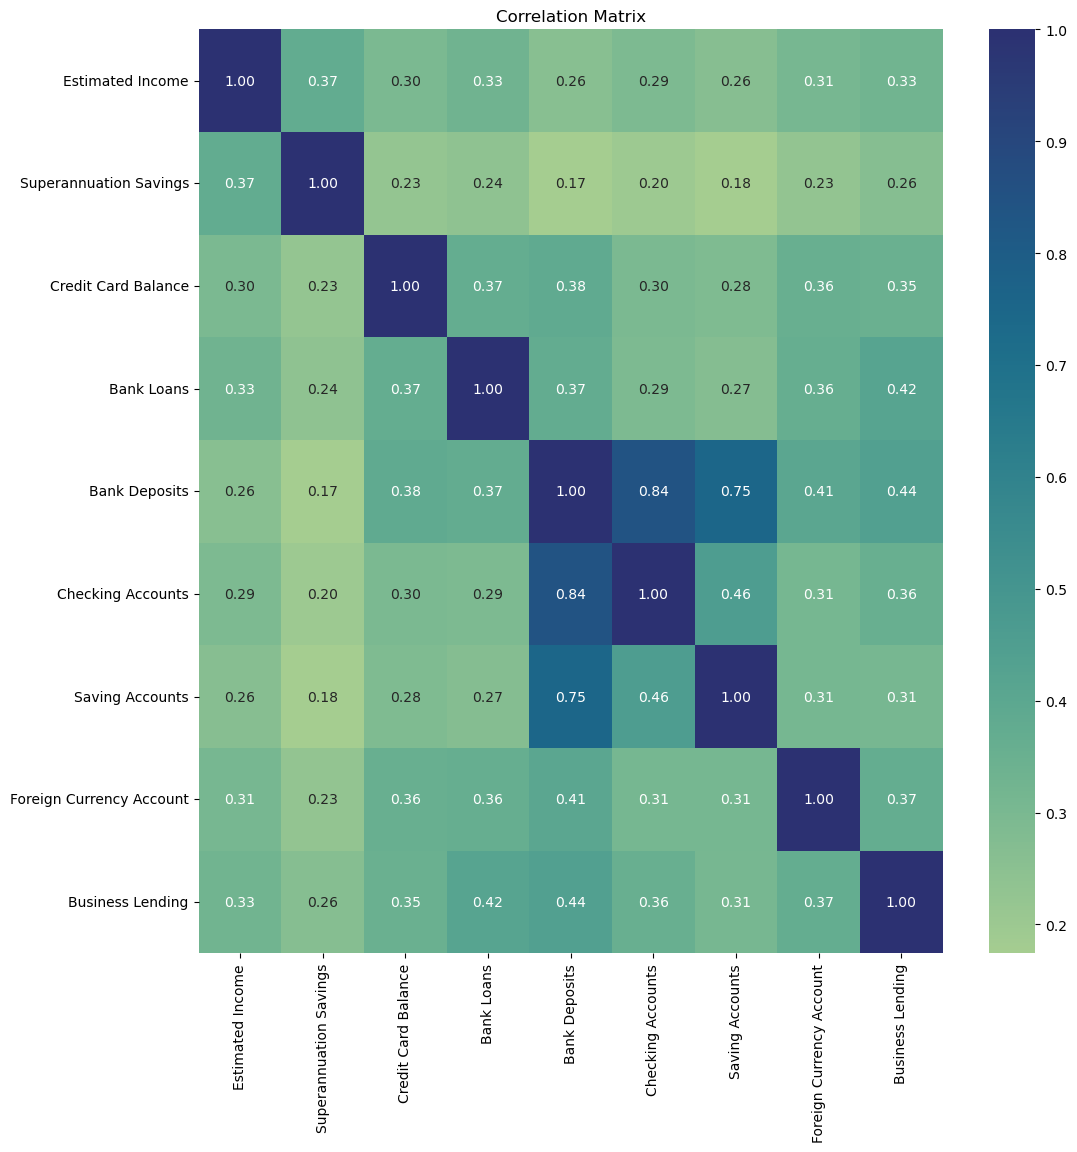

In [13]:
numerical_cols=['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Insights of EDA

"The Strongest positive correlation occurs among "Bank deposits" with "Checking Accounts","Saving Accounts
and "Foreign Currency Account" indicating that customers who maintain high balances in one account type
often hold substantial amount/funds accross other accounts as well."